In [6]:
import yfinance as yf
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from itertools import product
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [7]:
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

plt.style.use('seaborn')

In [8]:
df = yf.download("AAPL")

[*********************100%***********************]  1 of 1 completed


In [9]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099584,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094388,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087461,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089625,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092224,73449600
...,...,...,...,...,...,...
2023-05-22,173.979996,174.710007,173.449997,174.199997,174.199997,43570900
2023-05-23,173.130005,173.380005,171.279999,171.559998,171.559998,50747300
2023-05-24,171.089996,172.419998,170.520004,171.839996,171.839996,45143500


In [10]:
df = df[["Adj Close"]]
df.rename(columns = {'Adj Close':'Price'}, inplace = True)
df = df.resample("MS").mean()
df

,Price
Date,
1980-12-01,0.105446
1981-01-01,0.109645
1981-02-01,0.091471
1981-03-01,0.086024
1981-04-01,0.094306
...,...
2023-01-01,135.384739
2023-02-01,150.674965
2023-03-01,154.750734


In [11]:
df.describe()

,Price
count,510.000000
mean,17.127473
std,37.214799
min,0.044473
25%,0.241092
50%,0.409065
75%,15.109390
max,172.051314


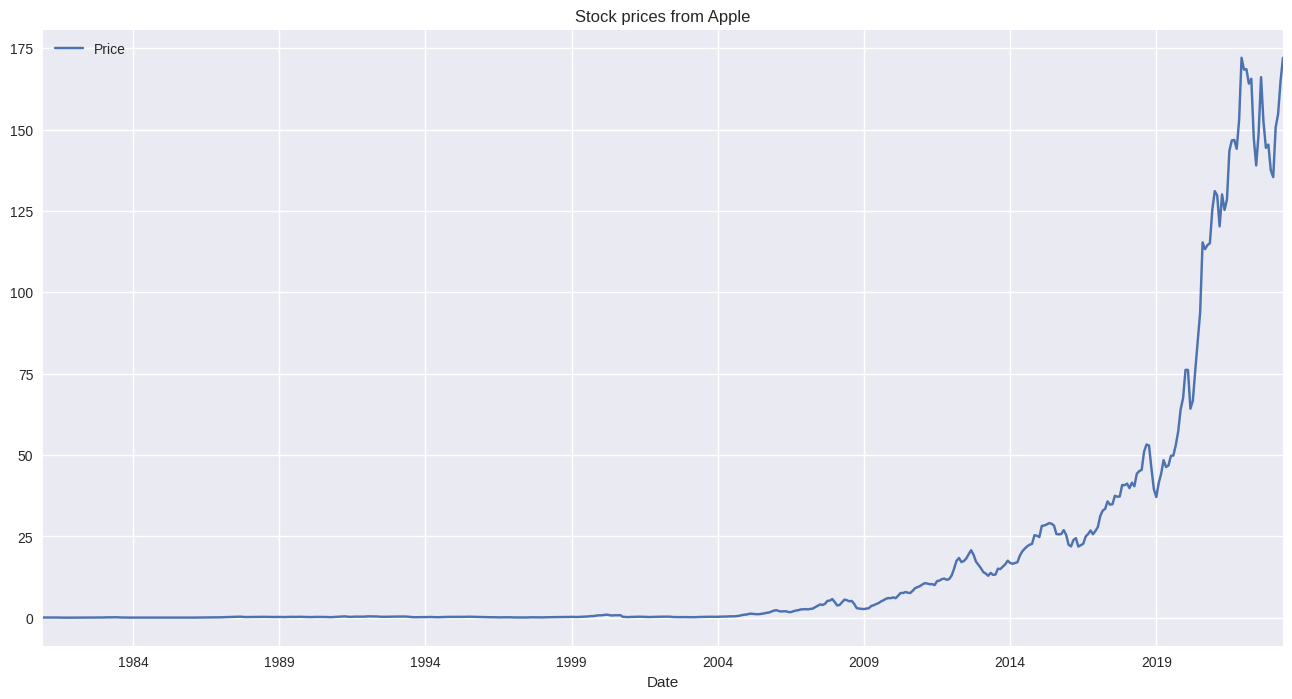

In [12]:
df.plot(figsize=(16,8))
plt.title("Stock prices from Apple")
plt.show()

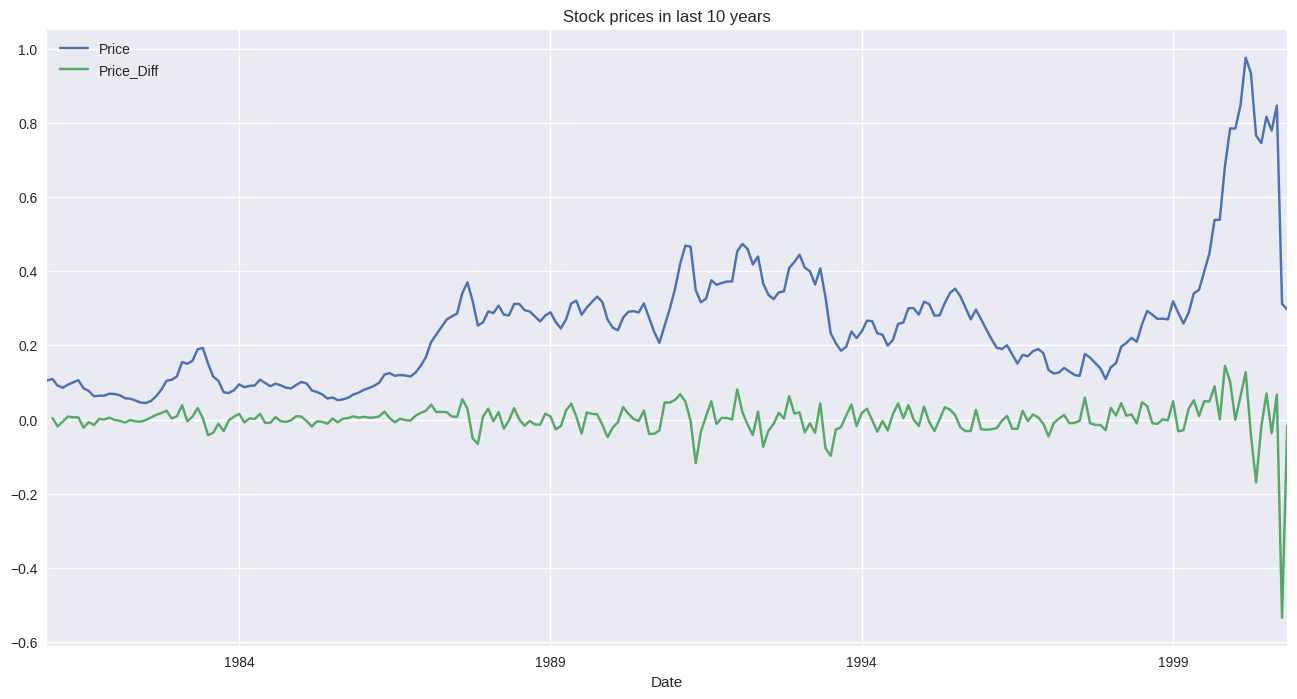

In [41]:
df[:(20*12)].plot(figsize=(16, 8))
plt.title("Stock prices in last 10 years")
plt.show()

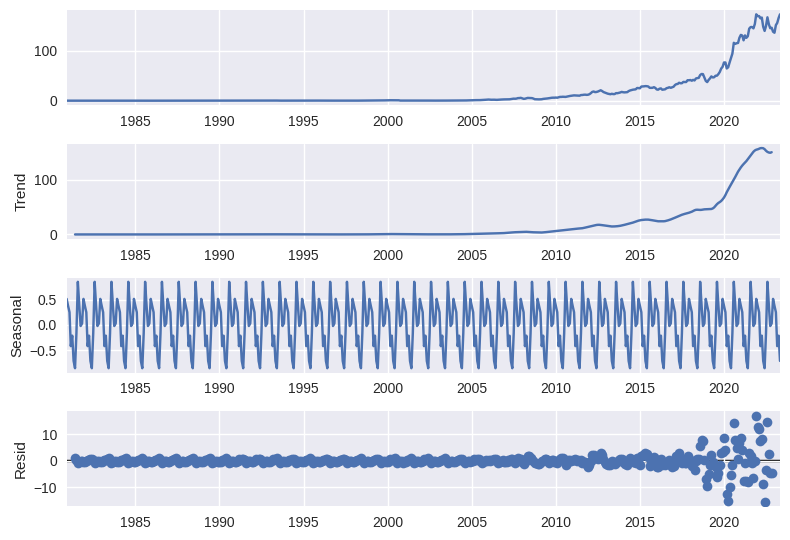

In [14]:
decomposition = seasonal_decompose(df, model='additive')
fig = decomposition.plot()
plt.show()

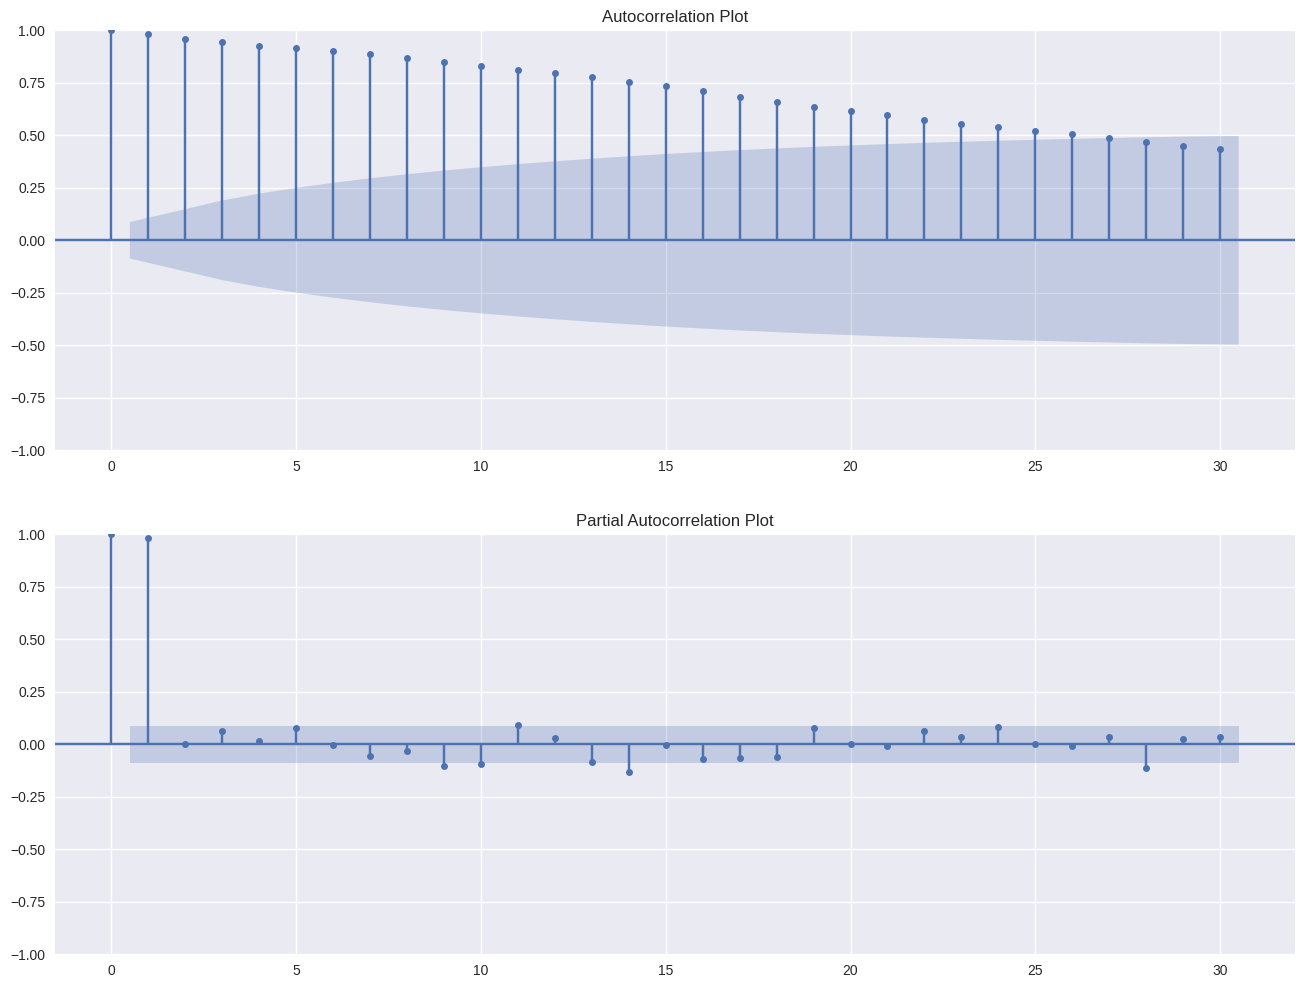

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 12))

ax1 = axes[0]
plot_acf(df['Price'], lags=30, ax=ax1)
ax1.set_title('Autocorrelation Plot')
ax2 = axes[1]
plot_pacf(df['Price'], lags=30, ax=ax2)
ax2.set_title('Partial Autocorrelation Plot')

plt.show()

In [16]:
result = adfuller(df['Price'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')   

ADF Statistic: 1.5322080255056119
n_lags: 0.997639245063333
p-value: 0.997639245063333
Critial Values:
   1%, -3.4437386290417082
Critial Values:
   5%, -2.867444458865948
Critial Values:
   10%, -2.5699148492415413


In [31]:
df['Price_Diff'] = df.Price - df.Price.shift(1)
df

,Price,Price_Diff
Date,,
1980-12-01,0.105446,NaN
1981-01-01,0.109645,0.004200
1981-02-01,0.091471,-0.018174
1981-03-01,0.086024,-0.005447
1981-04-01,0.094306,0.008282
...,...,...
2023-01-01,135.384739,-2.091579
2023-02-01,150.674965,15.290225
2023-03-01,154.750734,4.075770


In [32]:
result = adfuller(df['Price_Diff'].dropna(), autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')   

ADF Statistic: -2.7717898782453965
n_lags: 0.06241773856559358
p-value: 0.06241773856559358
Critial Values:
   1%, -3.4437386290417082
Critial Values:
   5%, -2.867444458865948
Critial Values:
   10%, -2.5699148492415413


<Axes: xlabel='Date'>

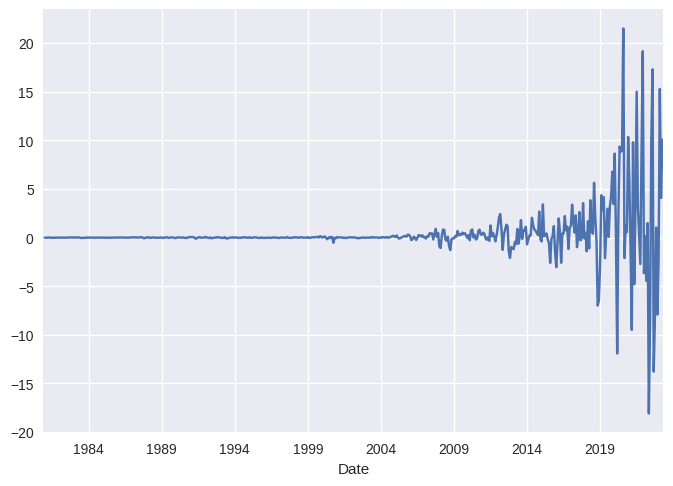

In [33]:
df['Price_Diff'].plot()

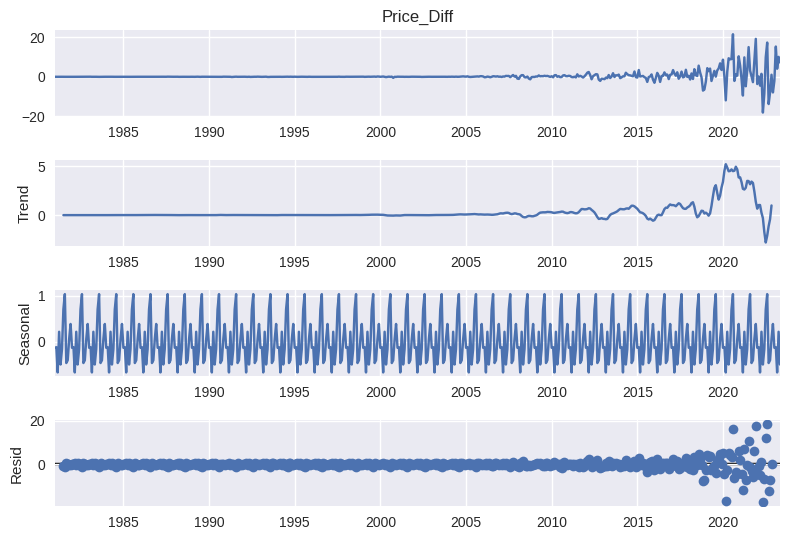

In [34]:
decomposition = seasonal_decompose(df['Price_Diff'].dropna(), model='additive')
fig = decomposition.plot()
plt.show()

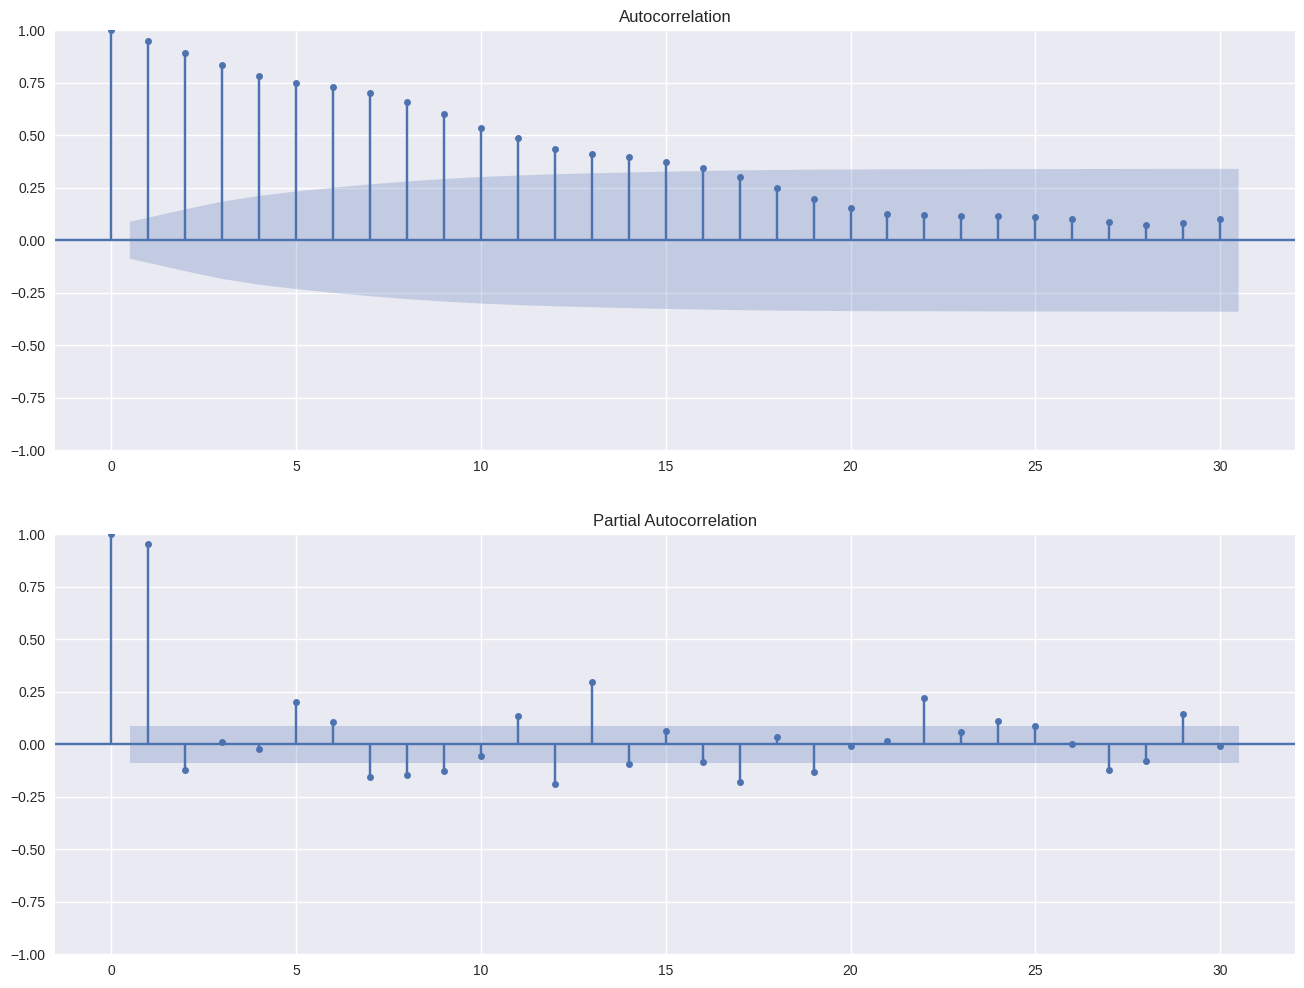

In [21]:
f, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (16, 12))
plot_acf(df['Price_Diff'].dropna(), lags = 30, ax = ax[0])
plot_pacf(df['Price_Diff'].dropna(), lags = 30, ax = ax[1])
plt.show()

In [35]:
def sarimax_param_tuning(data, p_values, d_values, q_values, seasonal_p_values, seasonal_d_values, seasonal_q_values, seasonal_periods):
    start = time.time()
    train_size = int(len(data) * 0.8)
    train_data, test_data = data[:train_size], data[train_size:]
    
    best_params = None
    best_rmse = float('inf')
    
    for p, d, q in product(p_values, d_values, q_values):
        for seasonal_p, seasonal_d, seasonal_q, seasonal_period in product(seasonal_p_values, seasonal_d_values, seasonal_q_values, seasonal_periods):
            order = (p, d, q)
            seasonal_order = (seasonal_p, seasonal_d, seasonal_q, seasonal_period)
            try:
                model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order)
                model_fit = model.fit()
                forecast = model_fit.get_forecast(steps=len(test_data))
                forecasted_values = forecast.predicted_mean
                rmse = np.sqrt(mean_squared_error(test_data, forecasted_values))
                if rmse < best_rmse:
                    best_rmse = rmse
                    best_params = [order, seasonal_order]
        
            except:
                continue
        
    model = SARIMAX(train_data, order=best_params[0], seasonal_order=best_params[1]).fit()
    pred = model.predict(start=len(train_data), end=len(data)-1)
    
    train_data.plot(legend=True, label='Train')
    test_data.plot(legend=True, label='Test')
    pred.plot(legend=True, label='predictionSARIMAX')
      
    print(f"best parameters: {best_params}, with best rmse error: {best_rmse}")
    finish = time.time()
    print(f"Time for parameters search: {(finish - start)/60} minutes.")
    return best_params  

In [36]:
p_values = range(0, 3)
d_values = 1
q_values = range(0, 3)
seasonal_p_values = range(0, 3)
seasonal_d_values = 1
seasonal_q_values = range(0, 3)
seasonal_periods = [12]

In [37]:
total_comb = len(p_values) * len(d_values) * len(q_values) * len(seasonal_p_values) * len(seasonal_d_values) * len(seasonal_q_values) * len(seasonal_periods)
print("Total combinations:", total_comb)

TypeError: ignored

In [38]:
result = sarimax_param_tuning(df['Price'], p_values, d_values, q_values, seasonal_p_values, seasonal_d_values, seasonal_q_values, seasonal_periods)

TypeError: ignored

In [26]:
result

[(2, 0, 1), (1, 0, 1, 12)]

[(2, 1, 2), (0, 1, 0, 12)]

In [27]:
model = SARIMAX(df['Price'], order=result[0], seasonal_order=result[1])
model_fit = model.fit()

In [28]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Price   No. Observations:                  510
Model:             SARIMAX(2, 0, 1)x(1, 0, 1, 12)   Log Likelihood               -1227.296
Date:                            Mon, 29 May 2023   AIC                           2466.591
Time:                                    12:43:11   BIC                           2491.998
Sample:                                12-01-1980   HQIC                          2476.552
                                     - 05-01-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8225      0.060     13.742      0.000       0.705       0.940
ar.L2          0.1762      0.060      2.940      0.003       0.059       0.294
ma.L1          0.4362      0.055      7.941      0.000       0.329       0.544
ar.S.L12       0.8465      0.085      9.931      0.000       0.679       1.014
ma.S.L12      -0.6745      0.089     -7.546      0.000      -0.850      -0.499
sigma2         7.0651      0.137     51.529      0.000       6.796       7.334
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):              8984.97
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):           30585.31   Skew:                             0.49
Prob(H) (two-sided):                  0.00   Kurtosis:                        23.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

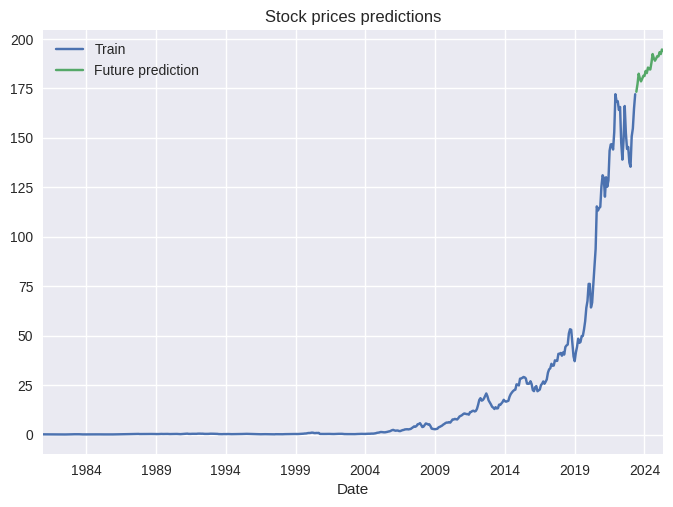

In [29]:
forecast = model_fit.get_forecast(steps=24)
forecasted_values = forecast.predicted_mean

df['Price'].plot(legend=True, label='Train')
forecasted_values.plot(legend=True, label='Future prediction')
plt.title("Stock prices predictions")
plt.show()

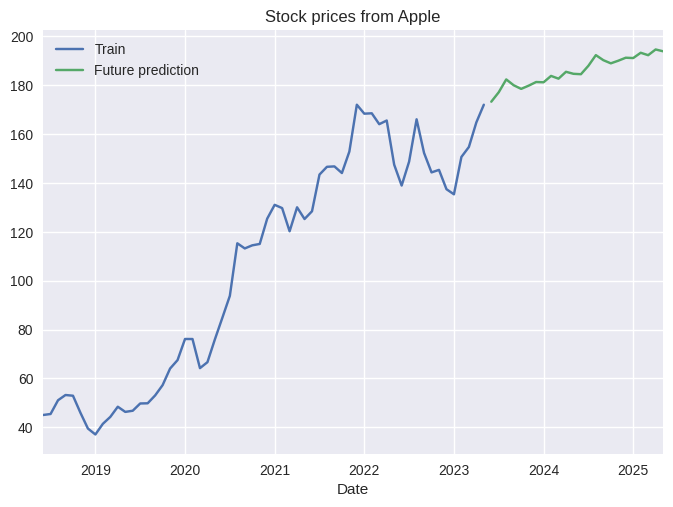

In [30]:
df['Price'][-(5*12):].plot(legend=True, label='Train')
forecasted_values.plot(legend=True, label='Future prediction')
plt.title("Stock prices from Apple")
plt.show()